# Trying out `object_graph.py` visualizers

In [1]:
import itertools
import sys

from fibonacci import fib_nest
from object_graph import draw_one_tuple, draw_tuples
from recursion import nest

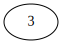

In [2]:
draw_one_tuple(3)

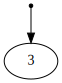

In [3]:
draw_one_tuple((3,))

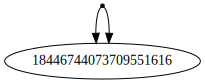

In [4]:
draw_one_tuple((2**64, 2**64))

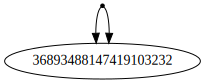

In [5]:
draw_one_tuple((2**65, 2**65))

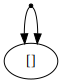

In [38]:
draw_one_tuple(([], []))

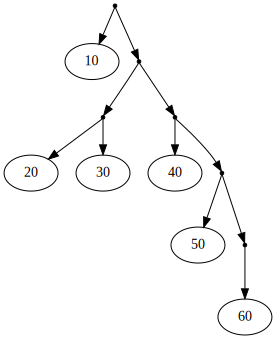

In [7]:
t = (10, ((20, 30), (40, (50, (60,)))))
draw_one_tuple(t)

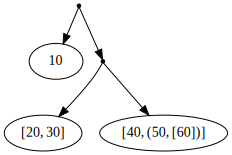

In [8]:
t = (10, ([20, 30], [40, (50, [60])]))
draw_one_tuple(t)

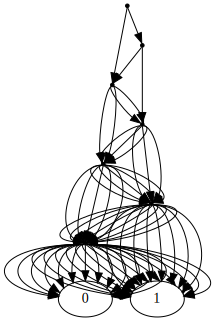

In [9]:
# t = ((((0, 1), (1, (0, 1))), ((1, (0, 1)), ((0, 1), (1, (0, 1))))),
#      (((1, (0, 1)), ((0, 1), (1, (0, 1)))),
#       (((0, 1), (1, (0, 1))), ((1, (0, 1)), ((0, 1), (1, (0, 1)))))))
# draw_one_tuple(t)
draw_one_tuple(fib_nest(8))  # De-duplication guaranteed.

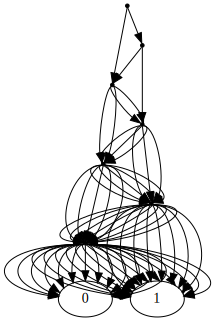

In [10]:
t = ((((0, 1), (1, (0, 1))), ((1, (0, 1)), ((0, 1), (1, (0, 1))))),
     (((1, (0, 1)), ((0, 1), (1, (0, 1)))),
      (((0, 1), (1, (0, 1))), ((1, (0, 1)), ((0, 1), (1, (0, 1)))))))
draw_one_tuple(t)  # De-duplication not guaranteed.

In [11]:
draw_tuples()  # Produces an empty graph.

In [12]:
t = 3
draw_tuples(t, t, t, t, t, t, t, t)  # Guaranteed to have only 1 node.

In [13]:
t = (10, ((20, 30), (40, (50, (60,)))))
draw_tuples(t)  # Same as draw_one_tuple.

In [14]:
t = (5, (10, 20))
u = ((10, 20), 30)
draw_tuples(t, u)

In [15]:
t = ('A', 'B', 'C', 'D', 'E')
u = ('A', 'B')
v = ('D', 'E')
w = (u, v)
x = (t, w)
draw_tuples(w, x)

In [16]:
t = ((('A', 'B'), ('C', 'D')), ('E', 'F'), ('G', 'H'))
u = (('C', 'D'), ('E', 'F'))
v = (('A', 'B'), ('G', 'H'))
draw_tuples(t, u, v)

In [17]:
t = ((), ((), ((), ((), ((), ((), ((), ((), ((), ((), 'hello'))))))))))
u = ('hello', ())
v = ((), ())
w = ('hello', 'hello')
draw_tuples(t, u, v, w)

In [18]:
draw_tuples(nest(seed='X', degree=2, height=4), nest(seed='Y', degree=3, height=2))

In [19]:
draw_tuples(nest(seed=('X', ()), degree=2, height=4), nest(seed=((), 'Y'), degree=3, height=2))

In [20]:
draw_tuples(*range(1, 6))  # All isolated vertices (the graph has no edges).

In [21]:
t = ((2, 7, 1), (8, 6), (9, (4, 5)), ((((5, 4), 3), 2), 1))
draw_tuples(t)

In [22]:
draw_tuples(t, (3, 6))

In [23]:
draw_tuples((2, 7, 1), (8, 6), (9, (4, 5)), ((((5, 4), 3), 2), 1))

In [24]:
draw_tuples((2, 7, 1), (8, 6), (9, (4, 5)), ((((5, 4), 3), 2), 1), (3, 6))

In [25]:
# De-duplication across nest() calls is not guaranteed and will usually be incomplete.
draw_tuples(*(nest(seed=(), degree=2, height=h) for h in range(10)))

In [26]:
# Same deal with fib_nest() calls.
draw_tuples(*(fib_nest(i) for i in range(12)))

In [27]:
# Just for fun.
draw_tuples(*(nest(seed=(), degree=d, height=h) for d in range(5) for h in range(7)))

In [28]:
draw_tuples(*(nest(seed=fib_nest(n), degree=n, height=n) for n in range(8)))

In [29]:
def make_binary_tree(height, start=0):
    leaves = itertools.count(start)
    
    def make_subtree(h):
        if h == 0:
            return next(leaves)
        return (make_subtree(h - 1), make_subtree(h - 1))
    
    return make_subtree(height)

In [30]:
draw_tuples(make_binary_tree(3))

In [31]:
draw_tuples(make_binary_tree(3), make_binary_tree(3))

In [32]:
draw_tuples(make_binary_tree(3, 1), make_binary_tree(3, 2))

In [33]:
draw_tuples(make_binary_tree(3, 1), make_binary_tree(3, 3))

In [34]:
draw_tuples(sys.version_info, tuple(sys.version_info))

In [35]:
draw_tuples(*(tuple(sys.version_info) for _ in range(25)))

In [36]:
draw_tuples(draw_tuples.__code__.co_varnames,  # Variables no enclosed scope captures.
            draw_tuples.__code__.co_cellvars)  # Variables some enclosed scope captures.

In [37]:
# draw_tuples(lambda x: x)  # The semipredicate problem.